In [1]:
%load_ext autoreload
%autoreload 2
import sys
from datetime import datetime, timedelta
import pandas as pd
import os


sys.path.append('../src/')
from Biologging_Toolkit.plot.spectrogram import interactive_spectrogram
from Biologging_Toolkit.processing.Inertial import Inertial
from Biologging_Toolkit.applications.Jerk import Jerk
from Biologging_Toolkit.plot.spectrogram import *
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,                # Enable LaTeX text rendering
    "font.family": "serif",             # Use a serif font
    "font.serif": ["Computer Modern"],  # Set font to Computer Modern (LaTeX default)
})

C:\Users\grosmaan\Desktop\Biologging_Toolkit\notebooks\../src\Biologging_Toolkit


#### Enter deployment ID and path

Finalized dataset will be saved or loaded from path

In [2]:
depid = 'ml17_280a'
path = 'D:/drift_dives_SES/'
path = 'D:/individus_brut/'
sens_path = os.path.join(path, 'CTD', depid, depid+'sens5.nc')
raw_path = os.path.join(path, 'individus', depid, 'raw')


#### Run cells to get PCAs

Time can be constructed from extisting time array or by entering the path to sens5 dataset.

In [3]:
aux = pd.read_csv(os.path.join(path, 'individus', depid, 'aux_data.csv'))  #Get existing dataframe with time array
inst = Jerk(depid, 
            path = os.path.join(path, 'individus',depid), 
            sens_path = sens_path, 
            raw_path = raw_path
           )


In [ ]:
#inst.create_time(aux.time.to_numpy())
#inst(overwrite = False)    #Calls low resolution jerk from sens5, then double checks with high resolution Acc data

#### Run cells to get posture and heading

In [ ]:
inst = Inertial(depid, 
            path = os.path.join(path, 'individus',depid))

In [ ]:
inst()

#### Plot values over spectrogram

In [13]:
## Example parameters
#debut = datetime(2018,10,20,3,14,30) + timedelta(seconds = 756)
#fin = datetime(2018,10,25,3,14,30) + timedelta(seconds = 756+9*60)
debut = datetime.fromtimestamp(1508088100+6*3600+ 47*60 + 40,  tz=timezone.utc)
fin = datetime.fromtimestamp(1508088100+6*3600 + 48*60 + 18,  tz=timezone.utc)
freq_min = 500
freq_max = 10001
print(debut, fin)

2017-10-16 00:09:20+00:00 2017-10-16 00:09:58+00:00


In [ ]:
nperseg = 2048
noverlap = 0.5
interactive_spectrogram(inst, debut, fin, freq_min, freq_max, raw_path,
                 nperseg = nperseg, noverlap = int(nperseg*noverlap))

C:\Users\grosmaan\Desktop\Biologging_Toolkit\notebooks\../src\Biologging_Toolkit\plot\spectrogram.py:241: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


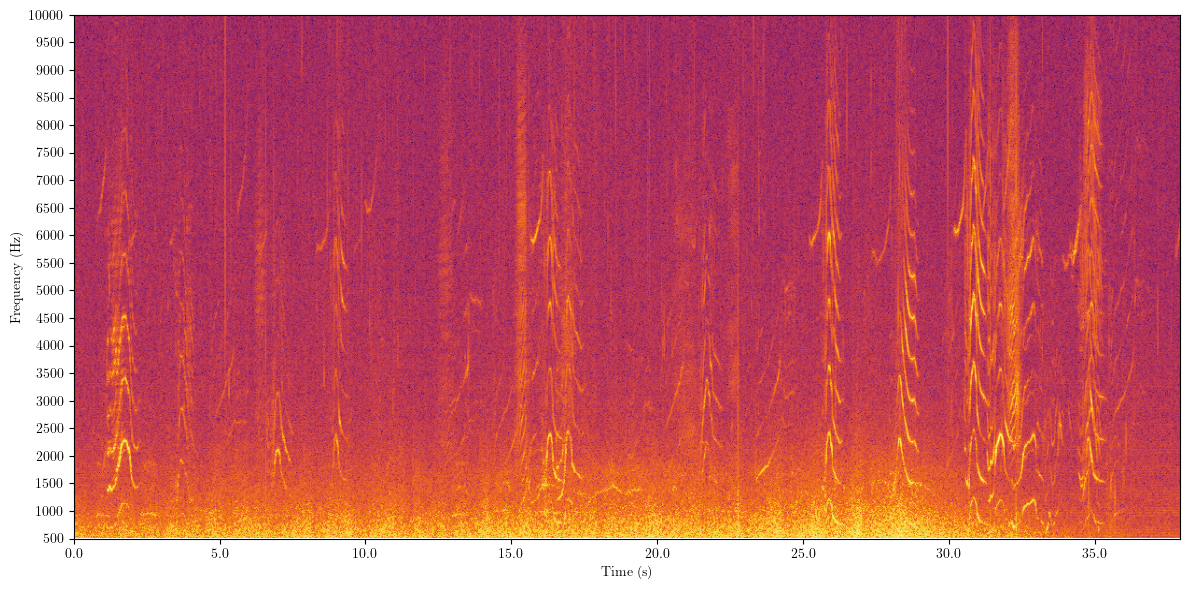

In [15]:
nperseg = 2048
noverlap = 0.4
plot_spectrogram(inst, debut, fin, freq_min, freq_max, raw_path,
                 nperseg = nperseg, noverlap = int(nperseg*noverlap), save = True,
                 path = 'C:/Users/grosmaan/Desktop/Results/', cmap = 'inferno',
                 title = 'KW', aspect = 'auto', figsize = (12,6))

In [23]:
dP = abs(inst.ds['depth'][:].data[1:] - inst.ds['depth'][:].data[:-1])
import numpy as np
dP = np.append(dP, [0])

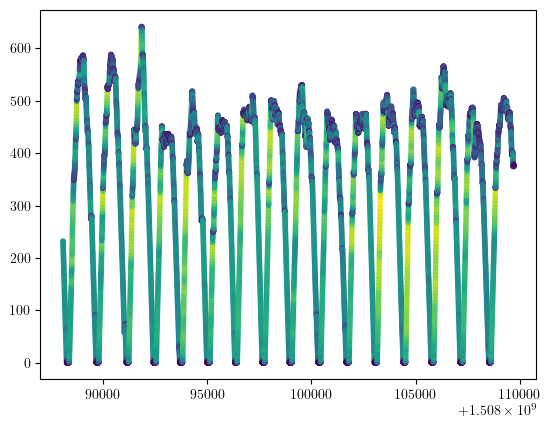

In [64]:
mask = (inst.ds['time'][:].data > 1508088100+0*3600) & (inst.ds['time'][:].data < 1508088100+6*3600)
plt.scatter(inst.ds['time'][:].data[mask], inst.ds['depth'][:].data[mask], c=dP[mask], s = 10)

In [56]:
debut = datetime.fromtimestamp(1508088100-3.498*3600,  tz=timezone.utc)
fin = datetime.fromtimestamp(1508088100-3.495*3600,  tz=timezone.utc)
mask = (inst.ds['time'][:].data > 1508088100-3.498*3600) & (inst.ds['time'][:].data < 1508088100-3.495*3600)

freq_min = 500
freq_max = 16001
print(debut, fin)

2017-10-15 13:51:47.200000+00:00 2017-10-15 13:51:58+00:00


C:\Users\grosmaan\AppData\Local\Temp\ipykernel_13732\2491893809.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


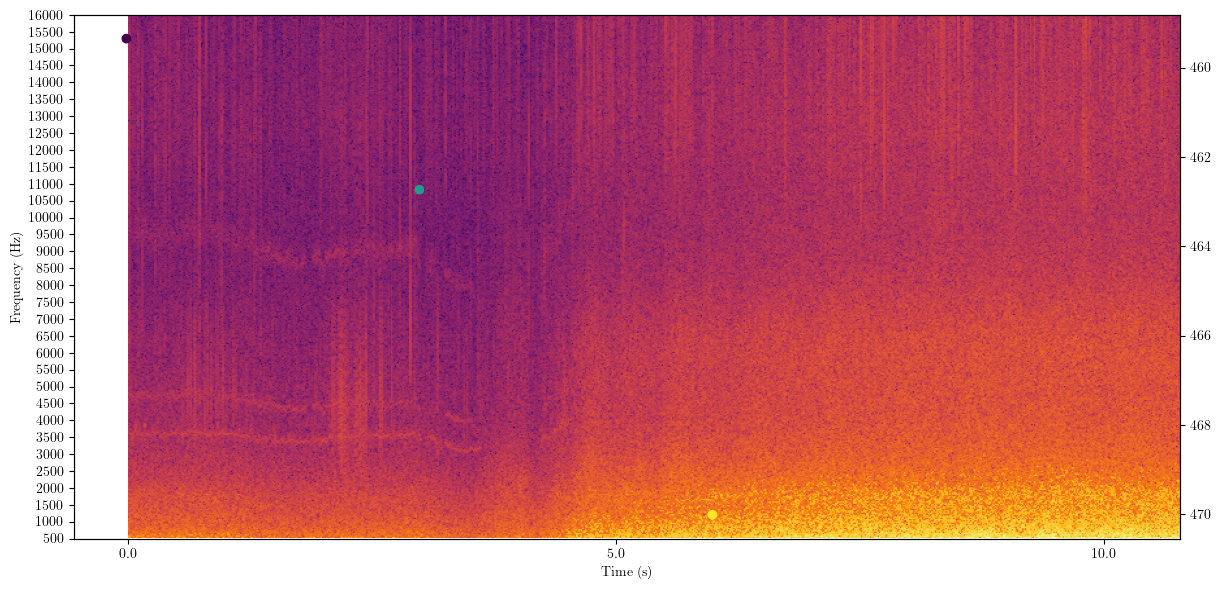

In [57]:
params = {'cmap':'inferno','title':'KW_interaction', 'aspect':'auto', 'figsize':(12,6), 'nperseg':1024, 'noverlap':int(1024*0.7)}
orig = {'figsize': (15,15),
    'title': 'Spectrogram',
    'y-label': 'Frequency (Hz)',
    'x-label': 'Time (s)',
    'path':'.',
    'aspect':'equal',
    'cmap':'binary'}
params = {**orig, **params}
debut = debut.replace(tzinfo = timezone.utc).timestamp()
fin = fin.replace(tzinfo = timezone.utc).timestamp()
# Compute spectrogram
timestamps = get_timestamp(raw_path)
f, t, Sxx = compute_spectrogram(debut, fin, freq_min, freq_max, timestamps, 1024, 512)
filter = np.percentile(Sxx, 97)
Sxx[Sxx > filter] = Sxx[Sxx > filter]*10
fig, ax = plt.subplots(figsize = params['figsize'])
im = ax.imshow(np.log10(Sxx), origin='lower', aspect = params['aspect'], cmap = params['cmap'], extent=[t[0], t[-1], f[0], f[-1]])
ax.set_xticks(np.arange(t[0], t[-1], 5))
ax.set_xticklabels([f"{tick:.1f}" for tick in np.arange(0, fin-debut, 5)])
ax.set_yticks(np.arange(freq_min, freq_max, 500))
ax.set_yticklabels([f"{tick:.0f}" for tick in np.arange(freq_min, freq_max, 500)])
ax.set_ylabel(params['y-label'])
ax.set_xlabel(params['x-label'])
ax.grid(False)
fig.tight_layout()
ax1 = ax.twinx()
ax1.scatter(inst.ds['time'][:].data[mask] - inst.ds['time'][:].data[mask][0], inst.ds['depth'][:].data[mask], c=dP[mask])
ax1.invert_yaxis()
#cbar = fig.colorbar(im, ax=ax)
#cbar.set_label(r"Log of power spectral density (dB re 1 $\mu Pa^2/Hz$)", rotation = 90, labelpad = 10)
#cbar.ax.yaxis.set_label_position('right')

fig.savefig(os.path.join(params['path'], f"{params['title']}.pdf"), bbox_inches='tight',pad_inches = 0.1)
fig.show()